<a href="https://colab.research.google.com/github/Fr33zz/mw/blob/master/3%20at.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
d = pd.read_csv("/content/drive/My Drive/'analytics'/payments/andgo.csv")

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25086 entries, 0 to 25085
Data columns (total 17 columns):
id                              25086 non-null int64
amount                          25086 non-null float64
card_info_id                    21277 non-null float64
confirmed_via_three_ds          25086 non-null bool
created_at                      25086 non-null object
expires_at                      25073 non-null object
exported_at                     0 non-null float64
global_id                       25086 non-null object
internal_payment_provider_id    635 non-null float64
invoice_type                    24936 non-null object
merchant_key                    24445 non-null object
meta                            24401 non-null object
order_id                        25086 non-null int64
payment_provider_type           25086 non-null object
state                           25086 non-null object
updated_at                      25086 non-null object
user_id                         2

In [ ]:
cols = ['amount', 'confirmed_via_three_ds', 'created_at', 'expires_at', 'invoice_type', 'state', 'updated_at']
d = d[cols]

for i in ['created_at',  'expires_at', 'updated_at']:
  d[i] = pd.to_datetime(d[i], utc=False)

In [ ]:
d = d.fillna(0)
d.pivot_table(index='state', aggfunc={'amount':'count'})

,amount
state,
charged,25086


In [ ]:
d['year-month'] = d['created_at'].dt.strftime("%Y-%m")

In [ ]:
tmp = d[d['invoice_type'] == 'subsequent_credit_payment'][['amount', 'confirmed_via_three_ds', 'year-month']]

tmp['confirmed_via_three_ds'] = tmp['confirmed_via_three_ds'].map(lambda x: 'customer' if x else 'other')

In [ ]:
t_count = tmp.pivot_table(index='year-month', columns='confirmed_via_three_ds', aggfunc={'amount':'count'})['amount']
t_count['all'] = t_count.sum(axis=1)
t_count.to_csv("/content/drive/My Drive/'analytics'/payments/done_at_count.csv")

In [ ]:
t_sum = tmp.pivot_table(index='year-month', columns='confirmed_via_three_ds', aggfunc={'amount':'sum'})['amount']
t_sum['all'] = t_sum.sum(axis=1)
t_sum.to_csv("/content/drive/My Drive/'analytics'/payments/done_at_sum.csv")

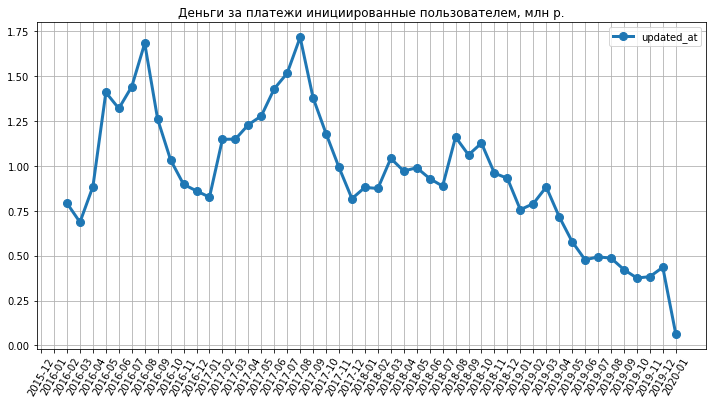

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(t_sum.index, t_sum['customer']/1e6, label=i, marker='o', lw=3, ms=8)

plt.title(label='Деньги за платежи инициированные пользователем, млн р.')
plt.xticks(rotation=60)
plt.legend()
plt.grid(True)
plt.show()

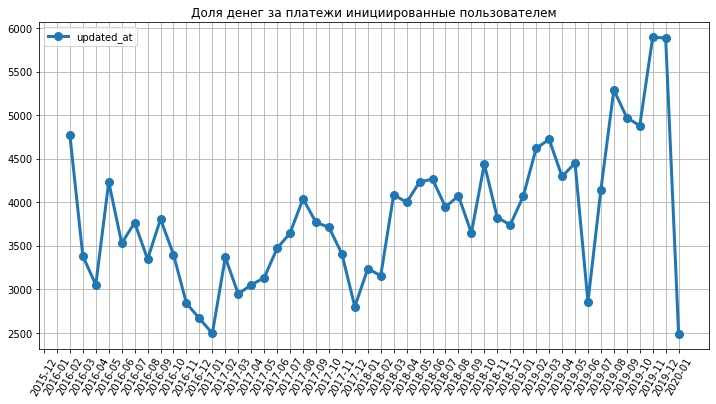

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(t_sum.index, t_sum['customer']/t1['all'], label=i, marker='o', lw=3, ms=8)

plt.legend()
plt.xticks(rotation=60)
plt.grid(True)
plt.title(label='Доля денег за платежи инициированные пользователем')
plt.show()
